In [1]:
from keras.datasets import mnist, fashion_mnist
import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [32]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()


In [33]:
print(y_train[0])

9


In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
X = np.zeros((X_train.shape[0], 784))

In [36]:
type(X)

numpy.ndarray

In [37]:
for i in range(X_train.shape[0]):
    X[i] = X_train[i].flatten()

In [38]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)
df = X

In [9]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE( random_state=0)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 86.38798761367798 seconds


In [10]:
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

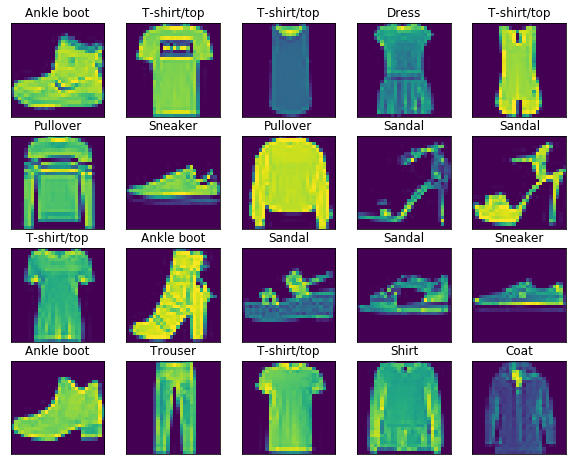

In [39]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i] )
    plt.title( target_dict[(y_train[i]) ])
    plt.xticks([])
    plt.yticks([])

In [40]:
#df['label']=  target_dict[(Y)]
df['label']=  Y

In [45]:
import matplotlib.patheffects as PathEffects
def plot_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=df['label'], cmap=plt.cm.get_cmap('Paired'))
    sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.
        class_text=target_dict[i]
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(class_text), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [46]:
target_dict[2]

'Pullover'

[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


(<Figure size 576x576 with 1 Axes>,
 [Text(26.215641, -17.207914, 'T-shirt/top'),
  Text(15.790206, -72.82981, 'Trouser'),
  Text(-42.1604, -0.7875556, 'Pullover'),
  Text(-0.48750764, -42.089436, 'Dress'),
  Text(-41.013466, -14.894207, 'Coat'),
  Text(32.02124, 23.880072, 'Sandal'),
  Text(-20.2123, -6.613039, 'Shirt'),
  Text(54.092514, 31.01086, 'Sneaker'),
  Text(-29.335096, 36.68308, 'Bag'),
  Text(11.834417, 59.80052, 'Ankle boot')])

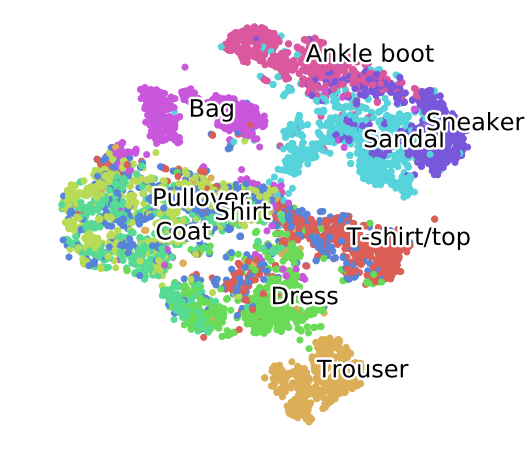

In [47]:
plot_scatter( tsne_results,    df['label'])

In [14]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE()
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 88.78586959838867 seconds


[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


(<Figure size 576x576 with 1 Axes>,
 [Text(26.215641, -17.207914, '0'),
  Text(15.790206, -72.82981, '1'),
  Text(-42.1604, -0.7875556, '2'),
  Text(-0.48750764, -42.089436, '3'),
  Text(-41.013466, -14.894207, '4'),
  Text(32.02124, 23.880072, '5'),
  Text(-20.2123, -6.613039, '6'),
  Text(54.092514, 31.01086, '7'),
  Text(-29.335096, 36.68308, '8'),
  Text(11.834417, 59.80052, '9')])

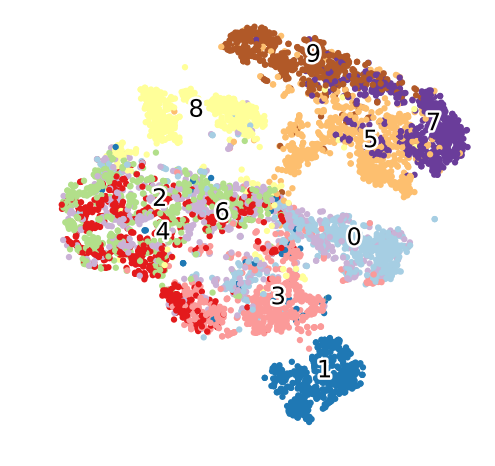

In [19]:
plot_scatter( tsne_results,     df['label'])

In [16]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(perplexity=40)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 87.43484234809875 seconds


[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


(<Figure size 576x576 with 1 Axes>,
 [Text(-68.99989, 3.1544728, '0'),
  Text(23.907482, 25.250538, '1'),
  Text(0.6635872, 52.0963, '2'),
  Text(-31.886755, -15.964581, '3'),
  Text(29.135084, -36.879173, '4'),
  Text(-14.765715, -22.431108, '5'),
  Text(-41.60464, 31.405733, '6'),
  Text(57.46685, -5.0442266, '7'),
  Text(-4.725118, -11.156961, '8'),
  Text(27.953426, -25.805964, '9')])

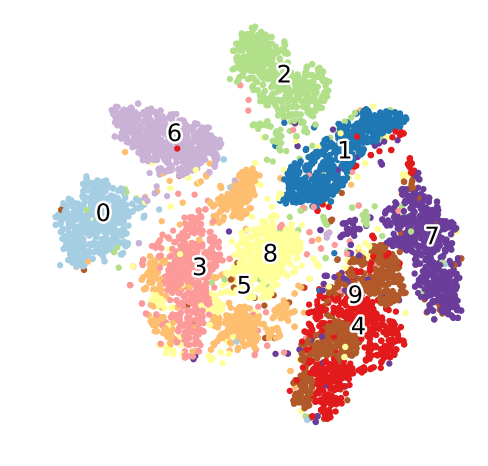

In [17]:
plot_scatter( tsne_results,     df['label'])

In [18]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(perplexity=10)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 72.71153402328491 seconds


[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


(<Figure size 576x576 with 1 Axes>,
 [Text(-68.37695, 40.585484, '0'),
  Text(7.991994, -77.04045, '1'),
  Text(-46.190815, -49.532043, '2'),
  Text(-41.871758, -6.215408, '3'),
  Text(58.493717, 23.369686, '4'),
  Text(-2.7405226, 36.150856, '5'),
  Text(-16.362696, 77.45724, '6'),
  Text(69.25625, -27.665838, '7'),
  Text(-3.3146925, -12.480318, '8'),
  Text(44.846375, 6.8877163, '9')])

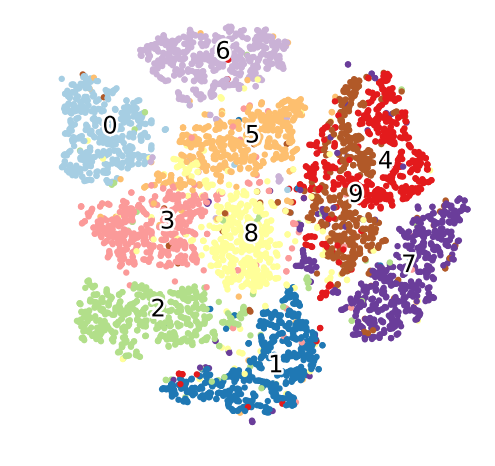

In [20]:
plot_scatter( tsne_results,     df['label'])


In [ ]:
df.replace({'label':target_dict}, inplace=True)